# Keywords and Defined Terms

## About
This section is looking at how the keywords could be connected 
with Defined Terms that point to external vocabularies that follow
a vocabulary publishing patterns like at the W3C
[Best Practice Recipes for Publishing RDF Vocabularies](https://www.w3.org/TR/swbp-vocab-pub/).

The pattern breaks down a bit when attempting to connect with things like 
the [Global Change Master Directory keywords](https://earthdata.nasa.gov/earth-observation-data/find-data/idn/gcmd-keywords).

A person could adapt the pattern to connect things like:
[EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY](https://gcmd.earthdata.nasa.gov/KeywordViewer/scheme/all/6eb3919b-85ce-4988-8b78-9d0018fd8089?gtm_keyword=OCEAN%20CHEMISTRY&gtm_scheme=Earth%20Science).  This does have a UUID (6eb3919b-85ce-4988-8b78-9d0018fd8089) but this is not a dereference-able PID.


## Keywords

We can see three different approaches here to defining keywords.

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "Map",
    "keywords": [
        {
            "@id": "http://purl.org/dc/dcmitype/Image",
            "@type": "DefinedTerm",
            "inDefinedTermSet": "http://purl.org/dc/terms/DCMIType",
            "name": "Image",
            "termCode": "Image"
        },
        "Region X",
        {
            "@id": "https://www.wikidata.org/wiki/Q350134",
            "@type": "URL",
            "name": "North Atlantic Ocean",
            "url": "https://www.wikidata.org/wiki/Q350134"
        }
    ]
}


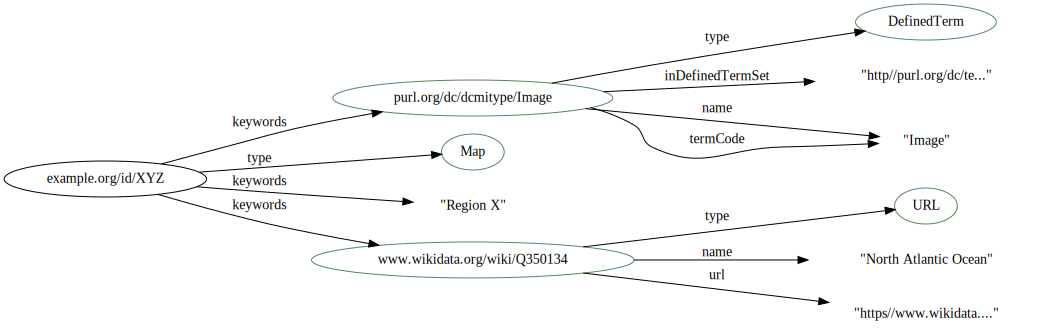

In [1]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/map.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Map",
  "keywords": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## Defined Terms

During generation of the structured data a provide may wish to 
either use or publish a set of controlled vocabulary terms or 
a similar set.  

Within schema.org this could be done by leveraging the "DefinedTerm" 
amd "DefinedTermSet" types.  

These types allow us both to define a set of terms and 
use a set of terms in describing a thing.

Note that DefinedTerm is an intangible and can connect to most 
types in Schema.org.  So we can use them in places such as:

* CreativeWork -> keyword
* LearningResource -> teaches
* PropertyValue -> valueReference
* LearningResource -> competencyRequired
* CreativeWork -> learningResourceType


```{literalinclude} ./graphs/term.json
:linenos:
```



## References

* [schema.org/DefinedTerm](https://schema.org/DefinedTerm)
* [schema.org/DefinedTermSet](https://schema.org/DefinedTermSet)